<a href="https://colab.research.google.com/github/smhnkmr/cv_face_recognition/blob/main/cv_face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import zipfile
path = '/content/drive/MyDrive/ComputerVision/Datasets/yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
import os
print(os.listdir('/content/yalefaces/train'))

In [ ]:
def get_image_data():
  paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
  #print(paths)
  faces = []
  ids = []
  for path in paths:
    image = Image.open(path).convert('L') #convert to black and white
    image_np = np.array(image, 'uint8')
    id = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))

    ids.append(id)
    faces.append(image_np)

  return np.array(ids), faces



In [ ]:
get_image_data()

In [ ]:
ids, faces = get_image_data()

In [ ]:
faces[0]

In [ ]:
faces[0].shape

(243, 320)

In [ ]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create(radius=4, neighbors = 14, grid_x=9, grid_y=9)
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

In [ ]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier.yml')

In [ ]:
test_image = '/content/yalefaces/test/subject10.sad.gif'

In [ ]:
image = Image.open(test_image).convert('L')
image_np = np.array(image, 'uint8')
image_np

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 241, 255, 255],
       [255, 255, 255, ..., 234, 237, 252],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)

In [ ]:
prediction = lbph_face_classifier.predict(image_np)
prediction

(10, 36.84750735484425)

In [ ]:
expected_output = int(os.path.split(test_image)[1].split('.')[0].replace('subject', ''))
expected_output

10

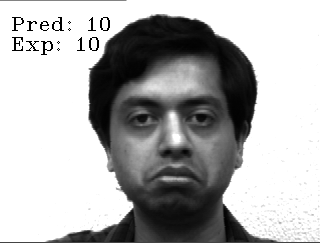

In [ ]:
cv2.putText(image_np, 'Pred: ' + str(prediction[0]), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255,0))
cv2.putText(image_np, 'Exp: ' + str(expected_output), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255,0))
cv2_imshow(image_np)

In [ ]:
paths = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
predictions = []
expected_outputs = []

for path in paths:
  image = Image.open(path).convert('L')
  image_np = np.array(image, 'uint8')
  prediction, _ = lbph_face_classifier.predict(image_np)
  expected_output = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))


  predictions.append(prediction)
  expected_outputs.append(expected_output)



In [ ]:
predictions = np.array(predictions)
expected_outputs = np.array(expected_outputs)


In [ ]:
predictions

array([12,  8, 14,  4,  6,  5,  9,  4,  1, 14, 14,  5, 12,  4, 13,  3, 13,
        7,  3, 12,  7, 11, 10,  9, 11,  4,  4, 15,  7,  4])

In [ ]:
expected_outputs

array([12,  8, 14,  8,  6,  5,  9, 10,  1, 14,  6,  5, 12,  4, 13,  3, 13,
       15,  3,  2,  9, 11, 10,  7, 11,  4,  2, 15,  7,  1])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(expected_outputs, predictions)

0.7

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_outputs, predictions)
cm

array([[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

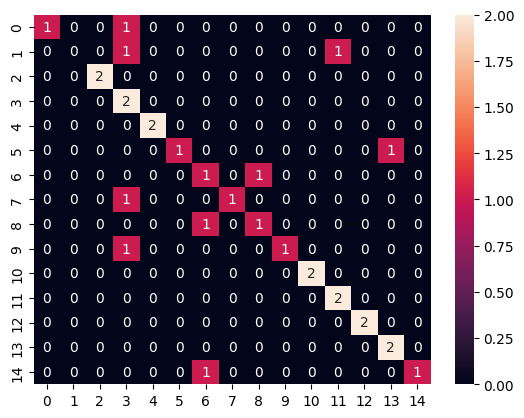

In [ ]:
import seaborn
seaborn.heatmap(cm, annot=True);

DLIB

In [1]:
import dlib
import cv2
from google.colab.patches import cv2_imshow

In [3]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor('/content/drive/MyDrive/ComputerVision/Weights/shape_predictor_68_face_landmarks.dat')

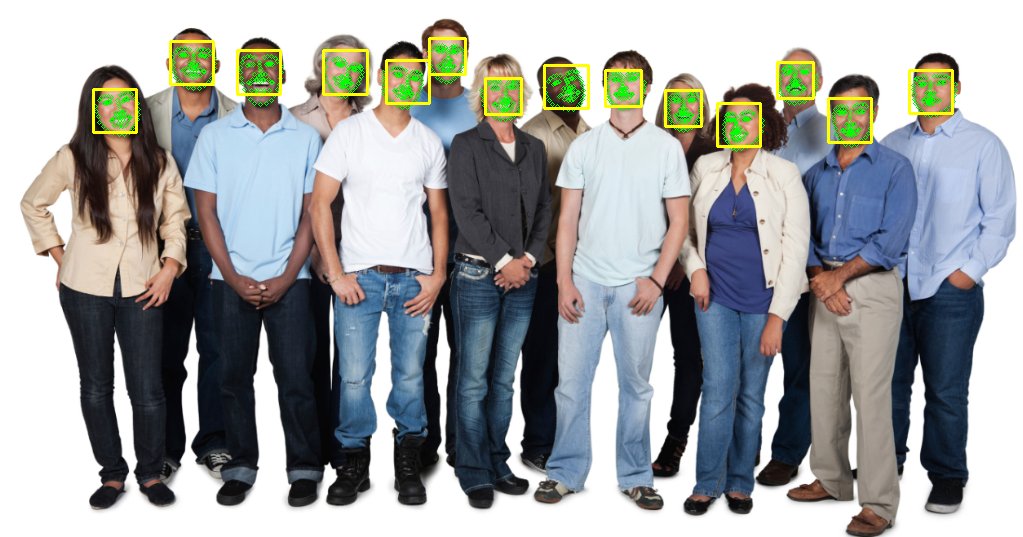

In [5]:
image = cv2.imread('/content/drive/MyDrive/ComputerVision/Images/people2.jpg')
face_detection = face_detector(image, 1)

for face in face_detection:

  points = points_detector(image, face)
  for p in points.parts():
    cv2.circle(image, (p.x, p.y), 2 ,(0, 255, 0), 1)

  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(image, (l, t), (r, b), (0, 255, 255), 2)
cv2_imshow(image)